In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# Load the dataset
df = pd.read_csv('../data/togo-dapaong_qc.csv')
df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [3]:
# Summary statistics for numeric columns
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


In [4]:
# Missing values count
missing = df.isna().sum()
missing[missing > 0]

Comments    525600
dtype: int64

In [5]:
# Columns with more than 5% nulls
missing_ratio = df.isna().mean()
missing_ratio[missing_ratio > 0.05]

Comments    1.0
dtype: float64

In [6]:
# Define key columns
cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB','Tamb','RH','WS','WSgust',	'WSstdev','WD','WDstdev','BP','Cleaning','Precipitation','TModA','TModB'
]

# Compute Z-scores
z_scores = np.abs(stats.zscore(df[cols_to_check].dropna()))
outlier_flags = (z_scores > 3)

# Count rows with any outliers
df_outliers = df[(outlier_flags).any(axis=1)]
print(f'Outlier rows: {len(df_outliers)}')

Outlier rows: 20178


In [7]:
# Impute with median (only for demo — use domain knowledge in real cases)
df_clean = df.copy()
for col in cols_to_check:
    if df_clean[col].isna().sum() > 0:
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())


In [8]:
df_clean.to_csv('../data/togo_clean.csv', index=False)

<Figure size 1400x600 with 0 Axes>

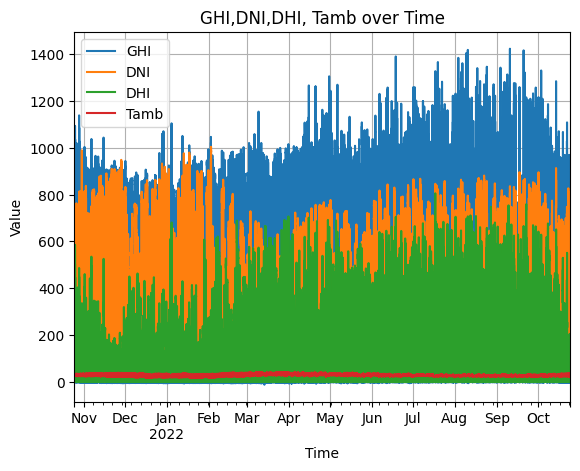

In [9]:
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])

plt.figure(figsize=(14, 6))
df_clean.set_index('Timestamp')[['GHI', 'DNI', 'DHI','Tamb',]].plot()
plt.title('GHI,DNI,DHI, Tamb over Time')
plt.ylabel('Value')
plt.xlabel('Time')
plt.grid(True)
plt.show()

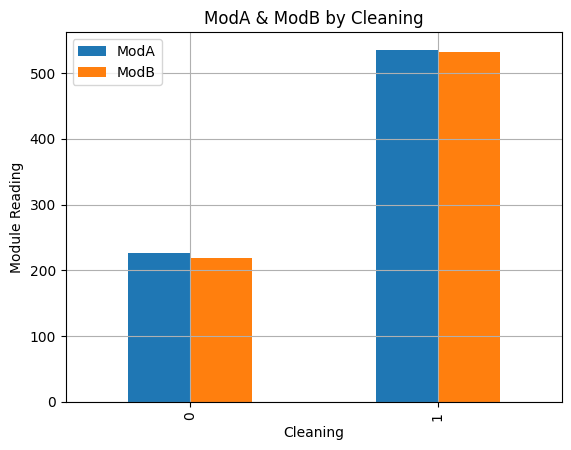

In [10]:
if 'Cleaning' in df_clean.columns:
    df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')
    plt.title('ModA & ModB by Cleaning')
    plt.ylabel('Module Reading')
    plt.grid(True)
    plt.show()

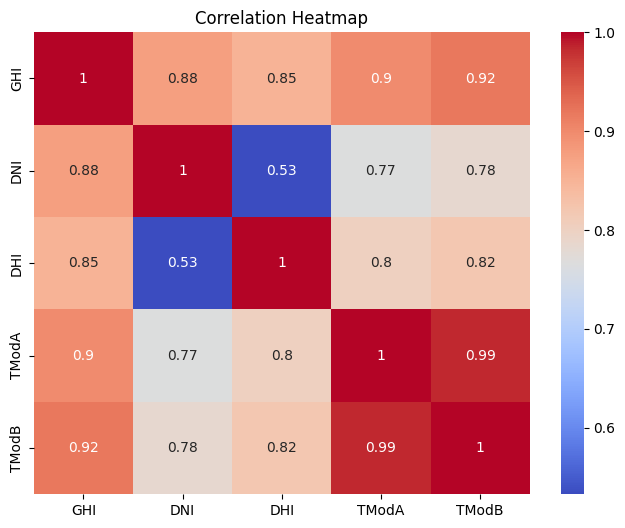

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(df_clean[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

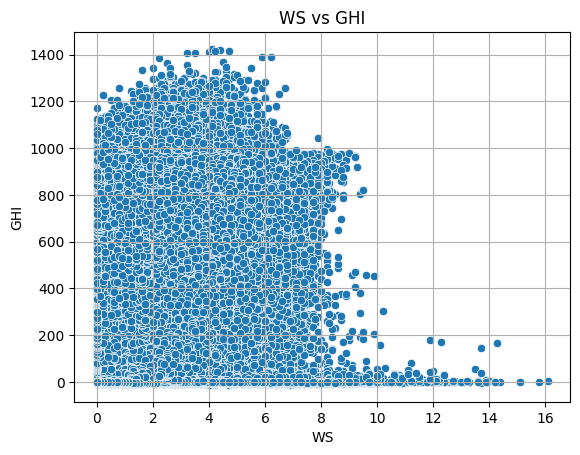

In [12]:
sns.scatterplot(data=df_clean, x='WS', y='GHI')
plt.title('WS vs GHI')
plt.grid(True)
plt.show()


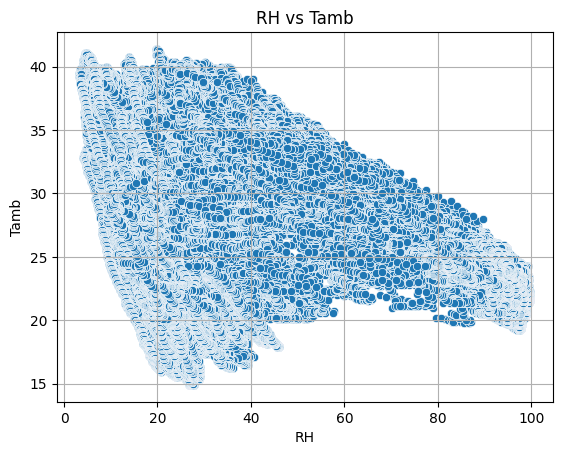

In [13]:
sns.scatterplot(data=df_clean, x='RH', y='Tamb')
plt.title('RH vs Tamb')
plt.grid(True)
plt.show()

In [14]:
# Requires windrose library: pip install windrose
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df_clean['WD'], df_clean['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Wind Rose')
plt.show()


ModuleNotFoundError: No module named 'windrose'

In [ ]:
df_clean['GHI'].hist(bins=30, figsize=(6,4))
plt.title('Histogram of GHI')
plt.grid(True)
plt.show()


In [ ]:
df_clean['WS'].hist(bins=30, figsize=(6,4))
plt.title('Histogram of WS')
plt.grid(True)
plt.show()

In [ ]:
fig = px.scatter(df_clean, x='GHI', y='Tamb',
                 size='RH', color='RH', 
                 title='GHI vs Tamb (Bubble size = RH)')
fig.show()
